# Challenge understanding

## Objective

Predict survival on Titanic dataset

## Competition Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.
<https://www.kaggle.com/c/titanic>


### Initial Idea
1. Load Library Modules
2. Load Datasets
3. Explore datasets
4. Analyse relations between features
5. Analyse missing values
6. Analyse features
7. Prepare for modelling
8. Modelling
9. Prepare the prediction for submission

### 1. Loading Library Modules

In [2]:
import warnings
warnings.filterwarnings('ignore')

# SKLearn Model Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression , Perceptron

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

# SKLearn ensemble classifiers
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier , BaggingClassifier
from sklearn.ensemble import VotingClassifier , AdaBoostClassifier

# SKLearn Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# plot functions
import pltFunctions as pfunc

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 2. Loading Datasets

In [3]:
train = pd.read_csv("./input/train.csv")
test    = pd.read_csv("./input/test.csv")

In [4]:
#combined = pd.concat([train.drop('Survived',1),test])
combined = train.append( test, ignore_index = True)
del train, test
full = combined
train = full[ :891 ]
combined = combined.drop( 'Survived',1)

In [6]:
print ('Datasets:' , 'combined:' , combined.shape , 'full:' , full.shape , 'train:' , train.shape)

Datasets: combined: (1309, 11) full: (1309, 12) train: (891, 12)


### 3. Exploring datasets

In [7]:
combined.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,237736


In [8]:
full.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [9]:
print(full.isnull().sum())
print("========================================")
print(train.info())

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 83.6+ KB
None


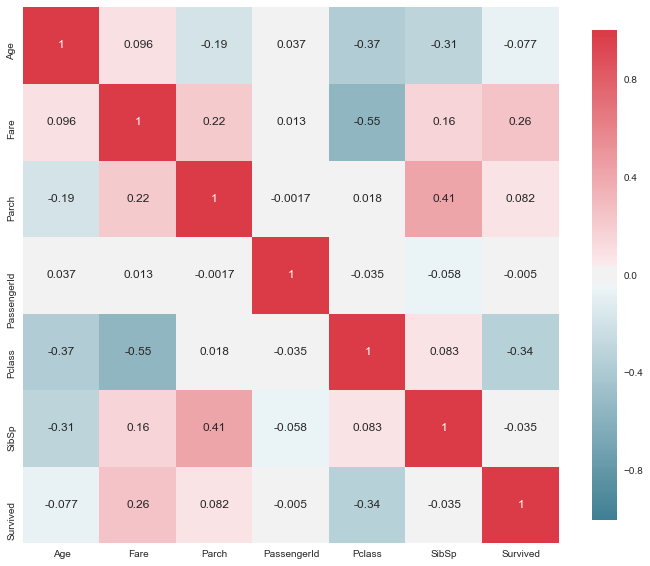

In [10]:
#pfunc.pltCorrel( combined )
pfunc.pltCorrel( train )
#pfunc.pltCorrel( full )

### Correlations to Investigate

  __Pclass__ is correlated to __Fare__  ( 1st class tickets would be more expensive than other classes )
  
  __Pclass__ x __Age__
  
  __SibSp__ X __Age__

  __SibSp__ x __Fare__

  __SibSp__ is correlate to __Parch__  ( large families would have high values of parents aboard and solo travellers would have zero parents aboard )

  __Pclass__ noticeable correlates to __Survived__  ( Expected correlation with higher classes to survive as known ) 

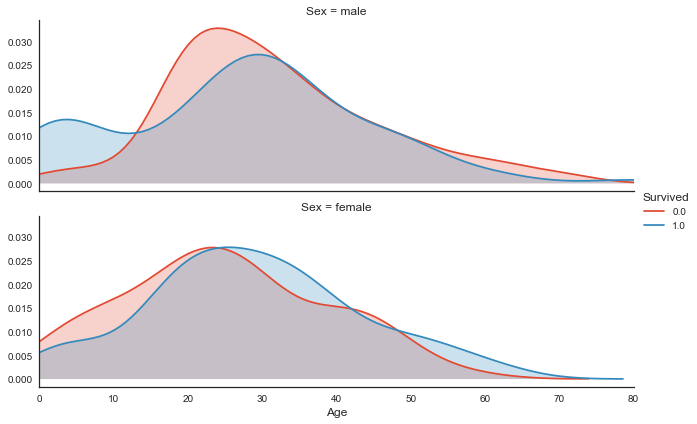

In [12]:
# Plot distributions of Age of passangers who survived or did not survive
pfunc.pltDistro( train , var = 'Age' , target = 'Survived' , row = 'Sex' )

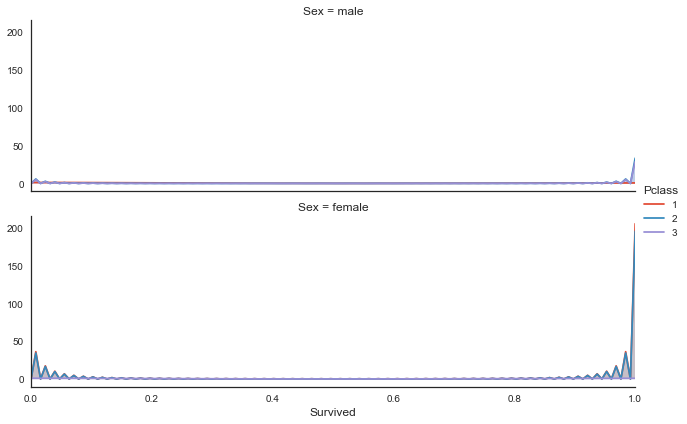

In [22]:
# Plot distributions of Fare of passangers who survived or did not survive
pfunc.pltDistro( train , var = 'Survived' , target = 'Pclass' , row = 'Sex' )

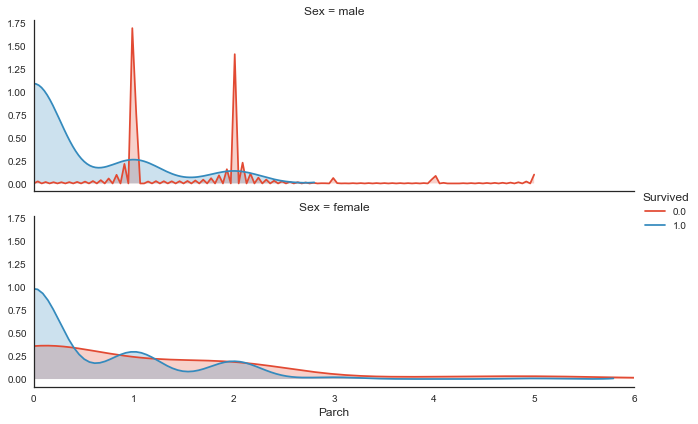

In [17]:
# Plot distributions of Parch of passangers who survived or did not survive
pfunc.pltDistro( train , var = 'Parch' , target = 'Survived' , row = 'Sex' )

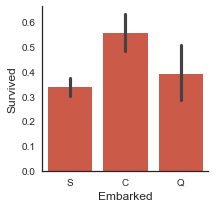

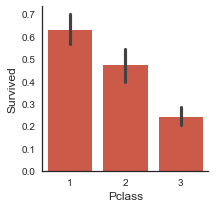

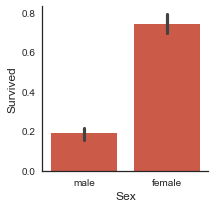

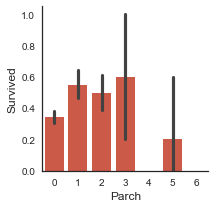

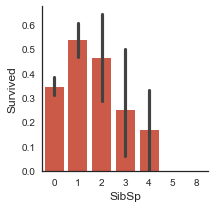

In [30]:
# Plot distributions of Age of passangers who survived or did not survive

pfunc.pltCategories( train , cat = 'Embarked' , target = 'Survived' ) 
pfunc.pltCategories( train , cat = 'Pclass' , target = 'Survived' )
pfunc.pltCategories( train , cat = 'Sex' , target = 'Survived' )
pfunc.pltCategories( train , cat = 'Parch' , target = 'Survived' )
pfunc.pltCategories( train , cat = 'SibSp' , target = 'Survived' )
#pfunc.pltDistro( train , var = 'Age' , target = 'Survived' , row = 'Sex' )